In [27]:
import sys
%matplotlib inline

sys.path.append("/Users/maithoma/work/github/bayesLearn/scripts/")


try:
    reload(bayesLib)
except:
    import bayesLib

from bayesLib import *

In [2]:
def rankorder(x):
	x1 = list(np.sort(x))
	x1.reverse()
	y1 = range(1,len(x1)+1)
	return np.array(x1),np.array(y1)

In [11]:
def binning(x,y,bins,log_10=False,confinter=5):
    '''makes a simple binning'''

    x = np.array(x);y = np.array(y)

    if isinstance(bins,int) or isinstance(bins,float):
        bins = np.linspace(np.min(x)*0.9,np.max(x)*1.1,bins)
    else:
        bins = np.array(bins)

    if log_10:
        bins = bins[bins>0]
        c = x > 0
        x = x[c]
        y = y[c]
        bins = np.log10(bins)
        x = np.log10(x)
        y = np.log10(y)

    Tbins = []
    Median = []
    Mean = []
    Sigma =[]
    Perc_Up = []
    Perc_Down = []
    Points=[]


    for i,ix in enumerate(bins):
        if i+2>len(bins):
            break

        c1 = x >= ix
        c2 = x < bins[i+1]
        c=c1*c2

        if len(y[c])>0:
            Tbins = np.append(Tbins,np.median(x[c]))
            Median =  np.append(Median,np.median(y[c]))
            Mean = np.append(Mean,np.mean(y[c]))
            Sigma = np.append(Sigma,np.std(y[c]))
            Perc_Down = np.append(Perc_Down,np.percentile(y[c],confinter))
            Perc_Up = np.append(Perc_Up,np.percentile(y[c],100 - confinter))
            Points = np.append(Points,len(y[c]))


    return {'bins' : Tbins,
            'median' : Median,
            'mean' : Mean,
            'stdDev' : Sigma,
            'percDown' :Perc_Down,
            'percUp' :Perc_Up,
            'nPoints' : Points}

### [in fact, at each submission, we observe the outcome of a (multiplicative?) process which leads to a power law distribution of coarse-grained increments between k and k+1]


In [5]:
fig_width_pt = 420.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27  # Convert pt to inch
golden_mean = (np.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width  # *golden_mean      # height in inches
fig_size = [fig_width, fig_height]

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'text.fontsize': 32,
          'legend.fontsize': 18,
          #'title.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'text.usetex': False,
          'figure.figsize': fig_size}
pl.rcParams.update(params)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
dir = "/Users/maithoma/github/bayesLearn/scripts/"

In [7]:
simplName = "simpleConvergenceMeans"
complName = "complexConvergenceMeans"

In [8]:
simpl = open(dir + "Data/simpleConvergenceMeans.csv",'rb').read().split(",")
compl = open(dir + "Data/complexConvergenceMeans.csv",'rb').read().split(",")
learn13 = open(dir + "Data/person13Learning.csv",'rb').read().split("\n")
explor = open(dir + "Data/exploration.csv",'rb').read().split("\n")


for l,line in enumerate(learn13):
    #print line.split(",")
    try:
        learn13[l] = map(float,line.split(","))
    except:
        print line
        
learn13 = np.array(learn13)

dfSimpleLearning = pandas.DataFrame.from_csv(dir + "Data/simple_distances.csv")#simple 
dfComplexLearning = pandas.DataFrame.from_csv(dir + "Data/complex_distances_2.csv")# complex

dfExplor = pandas.DataFrame.from_csv(dir + "Data/exploration.csv")
dfExplor = dfExplor[:-1]

#df = dfAllLearning
#df.index = map(int,df.index)

In [122]:
simple_distances = loadDistances(treatment="simple",remove_duplicates=False)
complex_distances = loadDistances(treatment="complex",remove_duplicates=False)


48

In [125]:
final_simple = np.array(simple_distances)[-1]
final_complex = np.array(complex_distances)[-1]

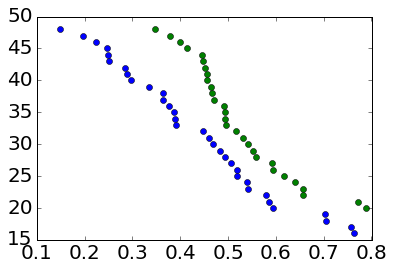

In [128]:
x,y = rankorder(final_simple)
pl.plot(x,y,'o')

x,y = rankorder(final_complex)
pl.plot(x,y,'o')

In [132]:
treatment = "complex"
data_dic = pd.read_pickle(dir + "Data/%s_models"%treatment)

with open(dir + 'Data/%sG'%treatment, 'r') as f:
    G = jp.decode(f.read())

### 1. Power Law Decay of JS-Distance

max:  0.657102661399 0.966666666667
0 LinregressResult(slope=-0.10433465469114427, intercept=-0.18984733144184873, rvalue=-0.91877362668368567, pvalue=0.0, stderr=0.00091895021952926258)
max:  0.677869829794 4.43333333333
1 LinregressResult(slope=-0.071619943085651616, intercept=-0.16648674544497355, rvalue=-0.93836929255804069, pvalue=0.0, stderr=0.00056013956565490006)


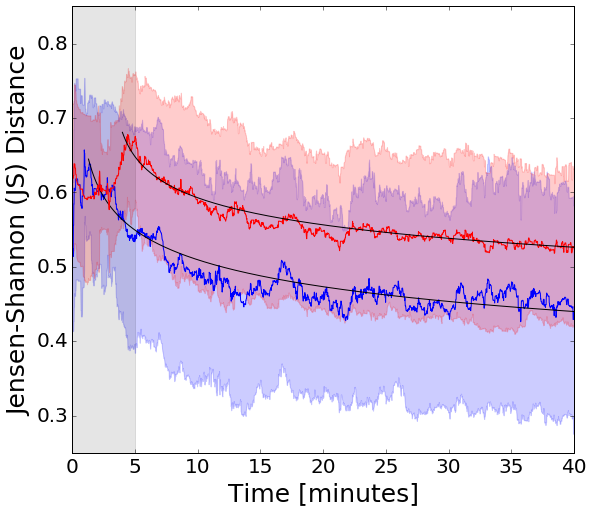

In [28]:
simple_distances = loadDistances(treatment="simple",remove_duplicates=False)
complex_distances = loadDistances(treatment="complex",remove_duplicates=False)

pl.figure(1,(9,8))
color = ["blue","red"]
tc = [0.3,3]
for k,kx  in enumerate([simple_distances,complex_distances][:]):
    #array = np.array(dfSimpleLearning)

    array = np.array(kx)
    X = []
    Y = []
    mean = []
    median = []
    std = []
    points = []
    percDown = []
    percUp = []
    
    for i,ix in enumerate(array):
        cond = np.logical_not(np.isnan(ix))
        
        if not len(ix[cond]):
            continue
        
        y = ix[cond]
        x = np.zeros_like(y)+i
        X = np.append(X,x)
        Y = np.append(Y,y)
        median = np.append(median,np.median(ix[cond]))
        mean  = np.append(mean,np.mean(ix[cond]))
        std = np.append(std,np.std(ix[cond]))
        points = np.append(points,float(len(ix[cond])))
        percDown = np.append(percDown,np.percentile(ix[cond],1))
        percUp = np.append(percUp,np.percentile(ix[cond],99))
      
    #print y
    #pl.figure(3)
    #B = binning(X,Y,500)
    #pl.plot(B['bins'],B['mean'],'.',color=color[k])
    
    print "max: ",np.max(mean),np.argmax(mean)/60.
    
    pl.figure(1)
    t = np.arange(1,len(mean)+1)/60.
    pl.plot(t,mean,color=color[k])
    pl.fill_between(t,mean-std,mean+std,color=color[k],alpha = 0.2)
    #pl.plot(t,percDown,'-.',color=color[k])
    #pl.plot(t,percUp,'-.',color=color[k])
    
    xShade = np.arange(0,6)
    pl.fill_between(xShade,np.zeros_like(xShade),np.zeros_like(xShade)+1,color="k",alpha=0.05)
    
    
    
    for j,jx in enumerate([mean,percDown,mean-std,mean+std][:1]):
        t = t - tc[k] + 1
        y = jx
        cond = (t > 1)*(y > 0)
        lt = np.log10(t[cond])
        ly = np.log10(y[cond])

        fit = S.linregress(lt,ly)
        print k,fit

        pl.plot(10**lt+tc[k],10**(lt*fit[0]+fit[1]),'k-')

    
pl.figure(1)    
pl.xlabel("Time [minutes]")
pl.ylabel("Jensen-Shannon (JS) Distance")
pl.xlim(0,40)
pl.ylim(0.25,0.85)
pl.savefig(dir + "Figures/decay_simple_complex.eps")

### Distribution of JS distance Jump Sizes

In [29]:
simple_distances = loadDistances(treatment="simple",remove_duplicates=True)
complex_distances = loadDistances(treatment="complex",remove_duplicates=True)


simple treatment
-0.000296869142072
[-0.00858985  0.00362277]
[-0.07715933  0.07408936]
[-0.19463969  0.26768895]
negative JS distance: 
LinregressResult(slope=-1.1376997680202301, intercept=-4.3384976872484806, rvalue=-0.90394660040574648, pvalue=1.4636579928606664e-37, stderr=0.054649070370008178)
positive JS distance: 
LinregressResult(slope=-1.3252812126767206, intercept=-4.8593588924480944, rvalue=-0.91965782761845849, pvalue=6.2178641597295249e-40, stderr=0.058371592271272706)

complex treatment
-1.11022302463e-16
[-0.00245531  0.00064251]
[-0.03746514  0.0273682 ]
[-0.10313744  0.15241029]
negative JS distance: 
LinregressResult(slope=-1.2335044852597559, intercept=-4.8519504210272144, rvalue=-0.9275785664386339, pvalue=2.7225957855814992e-58, stderr=0.043245673537344563)
positive JS distance: 
LinregressResult(slope=-1.3850526340150842, intercept=-5.2272899490019498, rvalue=-0.94251877660037786, pvalue=2.1217279687713227e-60, stderr=0.04427609647720842)


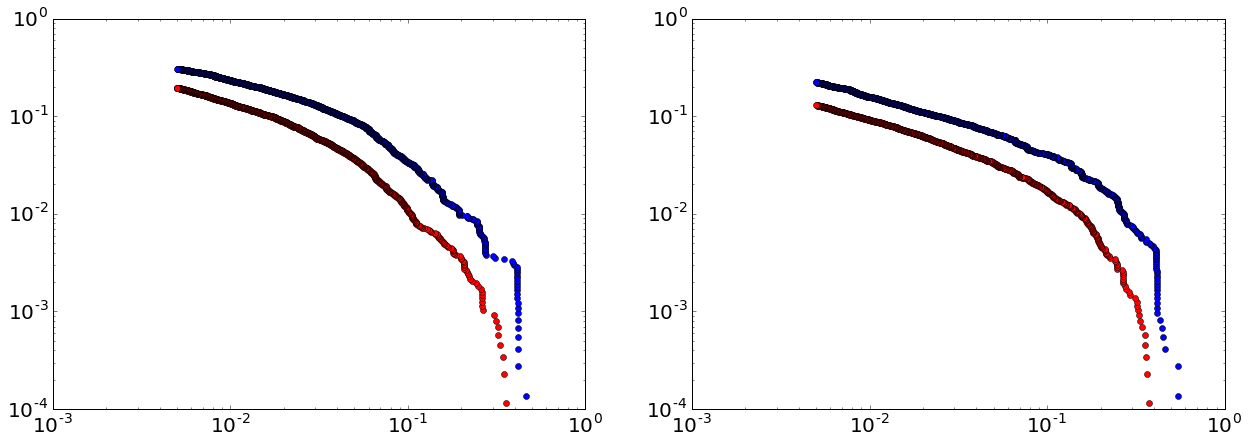

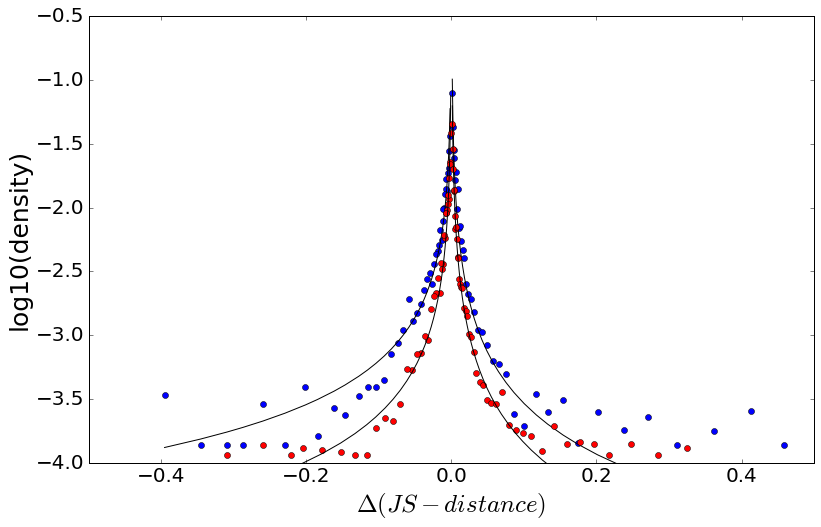

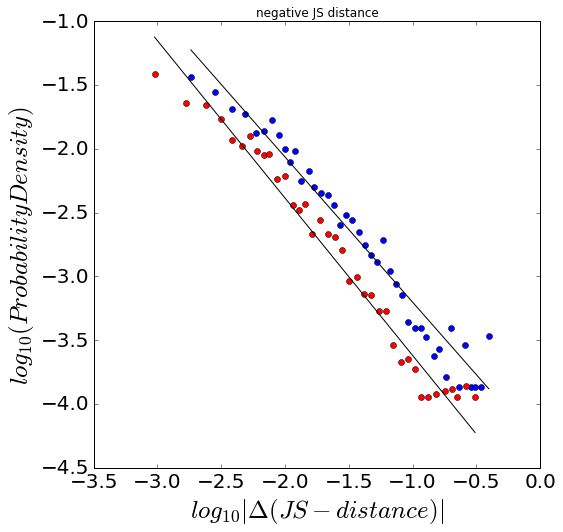

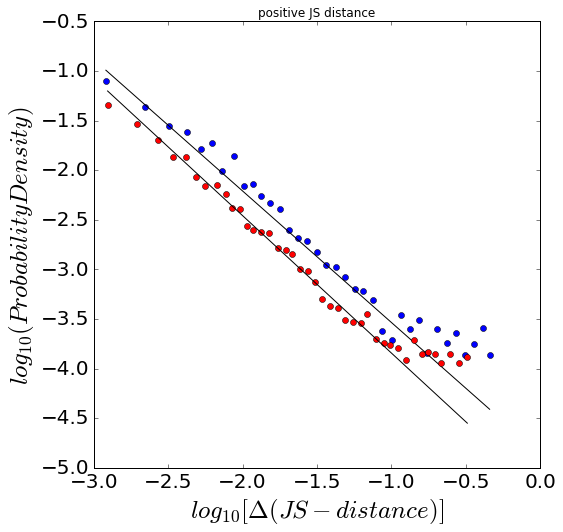

In [116]:
numbins = 50
#pl.figure(1,(9,7))
color = ["blue","red"]
for k,kx  in enumerate([simple_distances,complex_distances][:]):
    
    if k==0:
        print "\nsimple treatment"
    elif k == 1:
        print "\ncomplex treatment"
 

    array = np.array(zip(*np.array(kx)))
    
    deltaJSd = [] 
    for i,ix in enumerate(array):
        cond = np.logical_not(np.isnan(ix))
        
        if not len(ix[cond]):
            continue
            
        y = np.diff(ix[cond])
        deltaJSd = np.append(deltaJSd,y)
    
    
    #cond = (deltaJSd < 0)*(deltaJSd >= -0.01)
    #deltaJSd[cond] = 0.00
    
    #cond = (deltaJSd > 0)*(deltaJSd <= 0.01)
    #deltaJSd[cond] = 0.00
    
    pl.figure(1,(21,7))

    pl.subplot(121)
    x,y = rankorder(-deltaJSd)
    cond = x > 0.005
    pl.loglog(x[cond],y[cond]/float(y[-1]),'o',color=color[k])
    
    pl.subplot(122)
    x,y = rankorder(deltaJSd)
    cond = x > 0.005
    pl.loglog(x[cond],y[cond]/float(y[-1]),'o',color=color[k])
    

    
    
    
    pl.figure(2,(13,8))
    pl.xlabel("$\Delta(JS-distance)$")
    pl.ylabel("log10(density)")
    pl.xlim(-0.5,0.5)
    pl.ylim(-4,-0.5)
    
    
    H = np.histogram(deltaJSd,bins=1000)
    x = H[1][1:]
    y = H[0]/float(np.sum(H[0]))
    
    print np.median(deltaJSd)
    print np.percentile(deltaJSd,(25,75))
    print np.percentile(deltaJSd,(5,95))
    print np.percentile(deltaJSd,(1,99))
    
    # negative JS distance
    cond = (x < 0)*(y > 0)
    lx = np.log10(-x[cond])
    ly = np.log10(y[cond])
    condFit = (lx > -4.5)*(lx < -1.)
    #condFit = (lx > -3.5)*(lx < -2)
    fit = S.linregress(lx[condFit],ly[condFit])
    print "negative JS distance: \n" , fit
    B = binning(lx,ly,numbins)
    #pl.plot(x[cond],ly,'o',color=color[k])
    pl.plot(-10**B['bins'],B['mean'],'o',color=color[k])
    
    #pl.plot(-10**B['bins'],B['percUp'],'-',color=color[k])
    #pl.plot(-10**B['bins'],B['percDown'],'-',color=color[k])
    
    pl.plot(-10**B['bins'],B['bins']*fit[0]+fit[1],'k-')

    
    pl.figure(3,(8,8)) ## loglog panel negative JS distance
    pl.title("negative JS distance")
    #pl.plot(lx,ly,'k.',color=color[k])
    pl.plot(B['bins'],B['mean'],'o',color=color[k])    
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-')
    pl.xlabel("$log_{10}|\Delta(JS-distance)|$")
    
    pl.ylabel("$log_{10}(Probability Density)$")

    
    # positive JS distance
    pl.figure(2)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    condFit = (lx > -4.5)*(lx < -1.)
    #condFit = (lx > -3.5)*(lx < -2)
    fit = S.linregress(lx[condFit],ly[condFit])
    
    print "positive JS distance: \n" , fit
    B = binning(lx,ly,numbins)
    #pl.plot(x[cond],ly,'o',color=color[k])
    pl.plot(10**B['bins'],B['mean'],'o',color=color[k])
    
    #pl.plot(10**B['bins'],B['percUp'],'-',color=color[k])
    #pl.plot(10**B['bins'],B['percDown'],'-',color=color[k])
    
    pl.plot(10**B['bins'],B['bins']*fit[0]+fit[1],'k-')
    
    
    pl.figure(4,(8,8)) ## loglog panel positive JS distance
    pl.title("positive JS distance")
    pl.plot(B['bins'],B['mean'],'o',color=color[k])
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-')
    pl.xlabel("$log_{10}[\Delta(JS-distance)]$")
    pl.ylabel("$log_{10}(ProbabilityDensity)$")
    

pl.figure(2)
pl.savefig(dir + "Figures/pdfJSD.eps")
pl.figure(3)
pl.savefig(dir + "Figures/pdfJSD_loglog_negative.eps")

pl.figure(4)
pl.savefig(dir + "Figures/pdfJSD_loglog_positive.eps")

### Exploration versus Performance

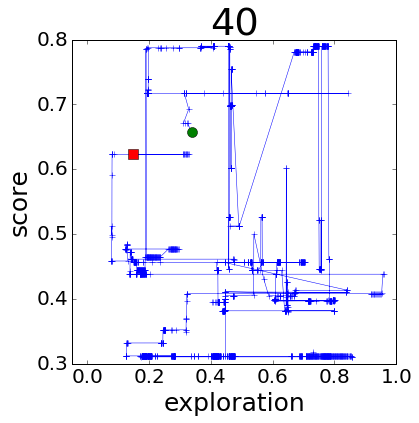

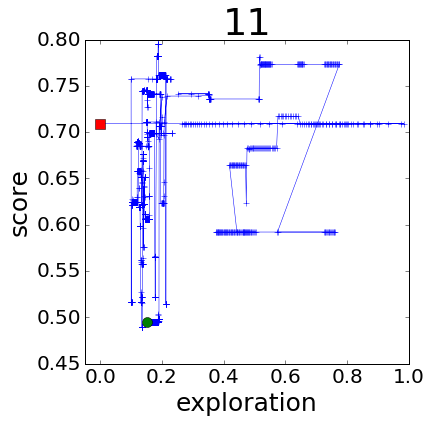

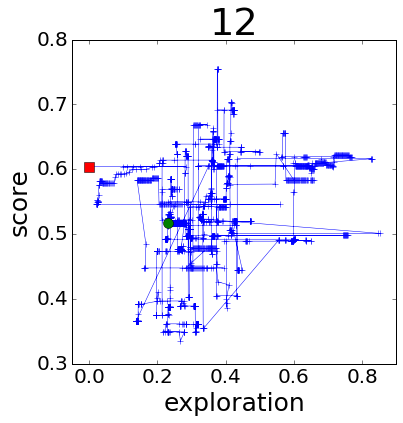

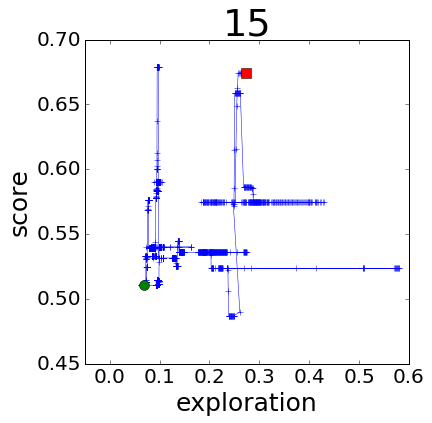

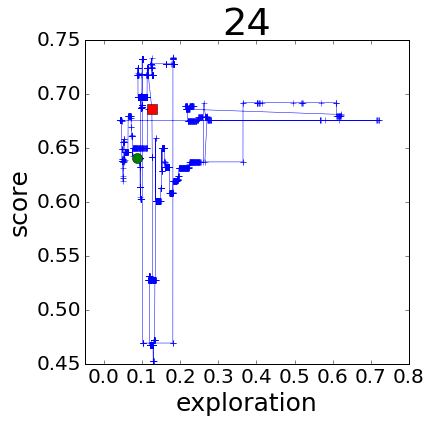

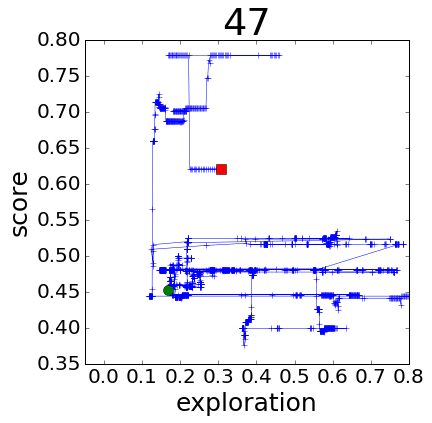

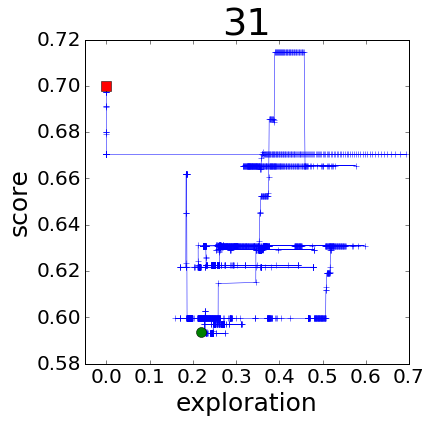

In [33]:
for i in range(48):
    score = dfAllLearning[str(i)].values[:]
    explor = dfExplor[str(i+1)].values[:]
    
    c = (~np.isnan(score))*(~np.isnan(explor))
    
    if i in [11,12,15,24,31,40,47]:
    #if i in np.arange(47,48):
        pl.figure(i)
        pl.title(i)
        pl.plot(explor[c],score[c],'+-',lw=0.5)
        pl.plot(explor[c][0],score[c][0],'rs',ms=10)
        pl.plot(explor[c][-1],score[c][-1],'go',ms=10)
        #break
        
        pl.xlabel("exploration")
        pl.ylabel("score")
        pl.xlim(xmin = -0.05)
        
        pl.savefig(dir + "Figures/score_explor_walk_%s.eps"%i)

In [11]:
simpl  = [float(x) for x in simpl]
x = np.arange(1,len(simpl)+1)
compl  = [float(x) for x in compl]

In [43]:
def prepareXY(filename,log=False):
    stringData = open(dir + "Data/%s.csv"%filename,'rb').read().split(",")
    Y = np.array([float(x) for x in stringData ])
    X = np.arange(1,len(Y)+1)
    
    if log:
        c = Y >0
        Y = np.log10(Y[c])
        X = np.log10(X[c])  
    return X,Y

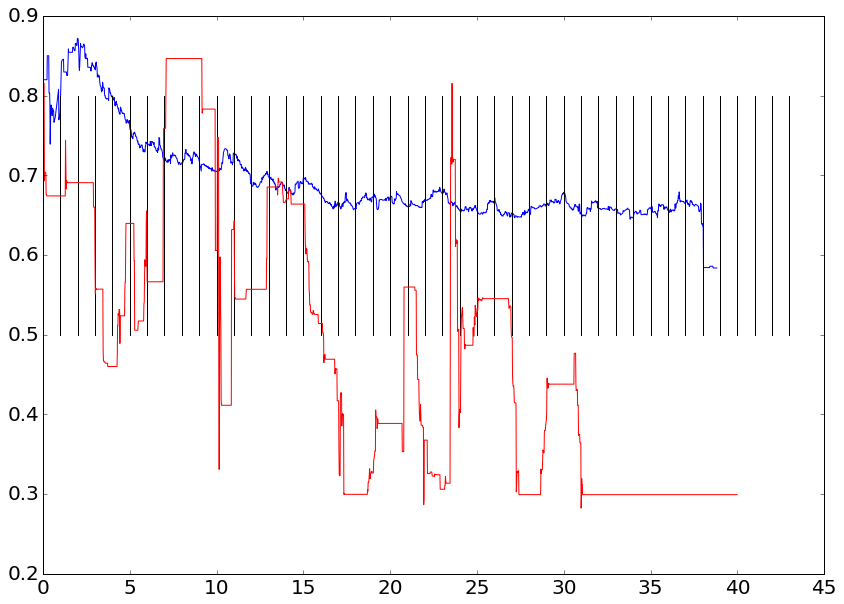

In [50]:
filename = complName
x,y = prepareXY(filename,log=False)
x = x/60.

pl.figure(1,(14,10))
pl.plot(x,y)

yline = np.linspace(0.5,0.8,10)


T = np.arange(0,44,1)
for i in T:
    xline = np.zeros_like(yline) + i
    pl.plot(xline,yline,'k-')
    
#pl.ylim(0.5,0.8)

pl.plot(learn13[:,0]/60.,learn13[:,1],'r-')

LinregressResult(slope=-0.093095490681215573, intercept=-0.1215610783049937, rvalue=-0.92191054796212424, pvalue=0.0, stderr=0.00078810173292323494)
LinregressResult(slope=-0.087805313813836827, intercept=-0.056609869121337364, rvalue=-0.94593012685034195, pvalue=0.0, stderr=0.00063237876503775435)


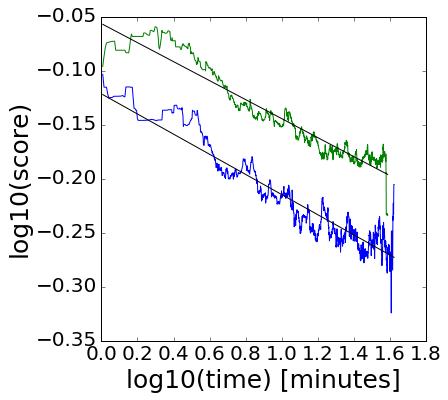

In [41]:
def plotFit(vector):
    '''Vector = {simpl,compl}'''
    y = np.array(map(float,vector))
    x = np.arange(1,len(vector)+1)/60.
    c = (x > 1)*(vector > 0)

    lx = np.log10(x[c])
    ly = np.log10(y[c])
    
    fit = S.linregress(lx,ly)
    print fit
    pl.plot(lx,ly)
    pl.plot(lx,lx*fit[0] + fit[1],'k-')
    
    pl.xlabel("log10(time) [minutes]")
    pl.ylabel("log10(score)")
    
    
plotFit(simpl)
plotFit(compl)

In [519]:
print 10**(-0.19)
print 10**(-0.17)

0.645654229035
0.676082975392


In [20]:
t = 60*24*365*275
print 0.65*t**(-0.10)
t = 60*24*365*900000
print 0.65*t**(-0.07)

#t = 60*24*1.29
#print 0.65*t**(-0.25)

0.0992920669873
0.099008049776


simple
SpearmanrResult(correlation=-0.029629045190838591, pvalue=0.011286220978352881)
LinregressResult(slope=-0.0018534263111505236, intercept=-0.00079888869284555999, rvalue=-0.079185462418874003, pvalue=0.74727455157329659, stderr=0.00565899790088948)
LinregressResult(slope=0.027264161563860134, intercept=0.48916568297158741, rvalue=0.44183703606109059, pvalue=0.058227120348702963, stderr=0.013425923418403604)
blah:  LinregressResult(slope=-0.52564222713220887, intercept=0.72096714272191731, rvalue=-0.98687673505097884, pvalue=8.6295201669461689e-109, stderr=0.0074023030706572663)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7360 but corresponding boolean dimension is 7312


power law fit : 1.9122717711 0.170871531543 137
complex
SpearmanrResult(correlation=-0.05372558732052251, pvalue=4.9734983554381477e-07)
LinregressResult(slope=-0.0062443026077720282, intercept=-0.0038386335462172474, rvalue=-0.19967925844152851, pvalue=0.42696402721710114, stderr=0.0076604733549574654)
LinregressResult(slope=0.0086213127219359649, intercept=0.56417762800291038, rvalue=0.22746964953096344, pvalue=0.36399976823571922, stderr=0.0092268424571264711)
blah:  LinregressResult(slope=-0.48833320166731142, intercept=0.69643702487352277, rvalue=-0.99127208954167534, pvalue=4.1914582544982789e-110, stderr=0.0058558677934531511)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8794 but corresponding boolean dimension is 8746


power law fit : 1.70064677644 0.1788854382 125


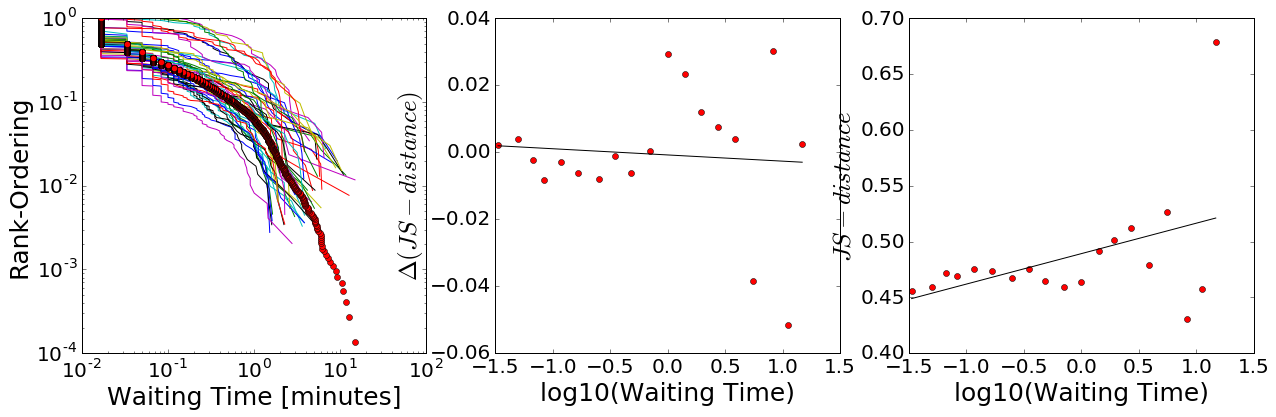

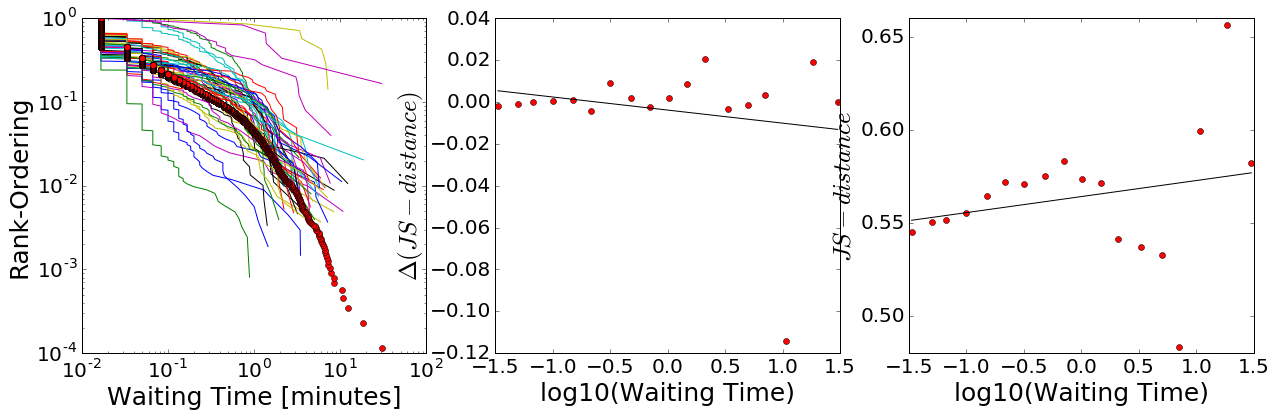

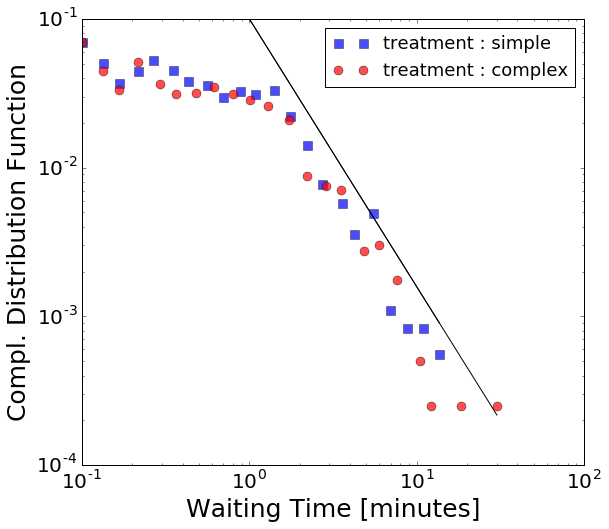

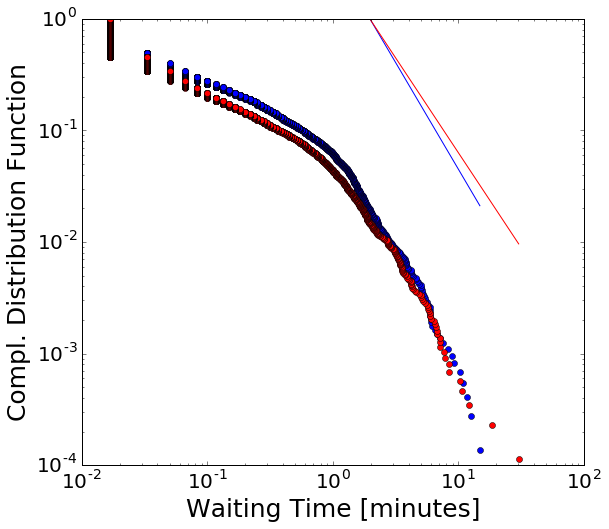

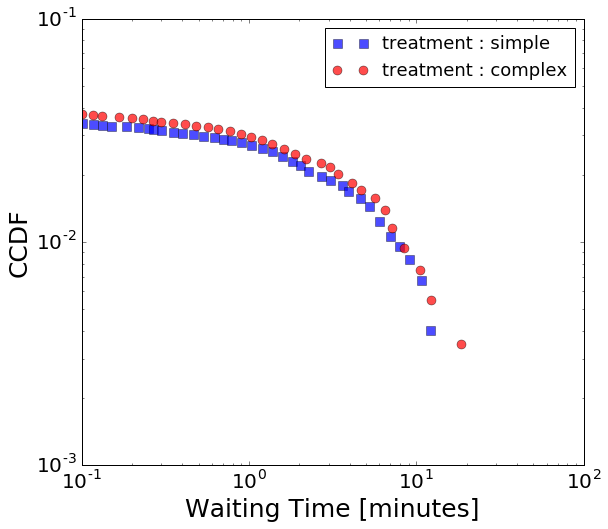

In [218]:
color = ["blue","red"]
symbol = ["s","o"]
for i,datatype in enumerate(['simple','complex']):
#datatype = "complex"

    print datatype
    test_dic = dict(loadDistances(treatment=datatype,remove_duplicates=True))
    WT = []
    JS = []
    dJS = []
    
    pl.figure(i+1,(21,6))
    for key in test_dic.keys():
        test = np.array(test_dic[key])
        index = np.argwhere(test>0)
        wt = np.concatenate([np.diff(index.flatten())])/60.
        js = test[index].flatten()
        djs = np.diff(test[index].flatten())

        pl.subplot(131)
        x,y = rankorder(wt)
        pl.loglog(x,y/float(y[-1]))
        pl.xlabel("Waiting Time [minutes]")
        pl.ylabel("Rank-Ordering")
        pl.ylim(0.0001,1)

        pl.subplot(132)
        #pl.semilogx(wt,djs,'.')
        pl.xlabel("log10(Waiting Time)")
        pl.ylabel("$\Delta(JS-distance)$")

        pl.subplot(133)
        #pl.semilogx(wt,js[1:],'.')
        pl.xlabel("log10(Waiting Time)")
        pl.ylabel("$JS-distance$")
        
        WT = np.append(WT,wt)
        JS = np.append(JS,js)
        dJS = np.append(dJS,djs)

    
        
    pl.subplot(131)
    x,y = rankorder(WT)
    pl.loglog(x,y/float(y[-1]),'ro')    
    
    pl.subplot(132)
    cond = (WT > 0)*(WT < 100)
    lWT = np.log10(WT[cond])
    B = binning(lWT,dJS[cond],20)
    
    print S.spearmanr(WT,dJS)
    
    pl.plot(B['bins'],B['mean'],'ro')
    fitB = S.linregress(B['bins'],B['mean'])
    print fitB
    pl.plot(B['bins'],B['bins']*fitB[0] + fitB[1],'k-')
    
    pl.subplot(133)
    B = binning(lWT,JS[cond],20)
    pl.plot(B['bins'],B['mean'],'ro')
    fitB = S.linregress(B['bins'],B['mean'])
    print fitB
    pl.plot(B['bins'],B['bins']*fitB[0] + fitB[1],'k-')
    
    pl.figure(5,(9,8))
    x,y = rankorder(WT)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    ly = ly/float(ly[-1])
    B = binning(lx,ly,30)
    
    cond = (lx > 0.3)
    print "blah: " ,S.linregress(lx[cond],ly[cond])
    
    pl.loglog(10**B['bins'],10**np.log10(B['nPoints']/np.sum(B['nPoints'])),'o',color=color[i],marker=symbol[i],ms=9,alpha=0.7,label="treatment : %s"%datatype)
    pl.loglog(10**B['bins'],10**(B['bins']*-1.8 - 1),'k-')
    #pl.loglog(x,y/float(y[-1]),'o',color=color[i],marker=symbol[i],label="treatment %s"%datatype)
    pl.legend(loc=0)
    pl.xlabel("Waiting Time [minutes]")
    #pl.ylabel("Probability Density Function")
    pl.ylabel("Compl. Distribution Function")
    pl.xlim(xmin=0.10)
    pl.ylim(ymax=0.10)
    pl.savefig(dir + "Figures/waiting_times_pdf.eps")
    
    
    pl.figure(6,(9,8))
    print "power law fit :",
    fitdic = plotPowerLawFit(WT,xmin=2.,continuousFit=True,addnoise=False,confint=.01,plot=False)
    pl.loglog(fitdic['x'],fitdic['y'],'o',color=color[i])
    pl.loglog(fitdic['xFit'],fitdic['yFit'],'-',color=color[i])
    pl.xlabel("Waiting Time [minutes]")
    pl.ylabel("Compl. Distribution Function")
    pl.savefig(dir + "Figures/waiting_times_ccdf.eps")
    #pl.xlim(xmin=3/60.)

    
    pl.figure(7,(9,8))
    x,y = rankorder(WT)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    ly = ly/float(ly[-1])
    B = binning(lx,ly,50)
    pl.loglog(10**B['bins'],10**np.log10(B['mean']/np.sum(B['mean'])),'o',color=color[i],marker=symbol[i],ms=9,alpha=0.7,label="treatment : %s"%datatype)
    #pl.loglog(x,y/float(y[-1]),'o',color=color[i],marker=symbol[i],label="treatment %s"%datatype)
    pl.legend(loc=0)
    pl.xlabel("Waiting Time [minutes]")
    pl.ylabel("CCDF")
    pl.xlim(xmin=0.10)
    pl.ylim(ymax=0.10)
    

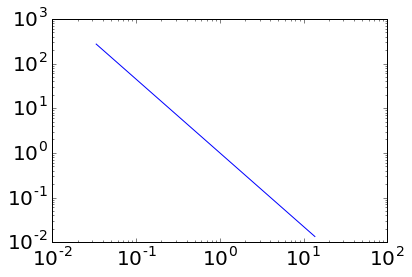

In [207]:
pl.loglog(10**B['bins'],10**(B['bins']*-1.65))